In [1]:
import sys

import numpy as np
from matplotlib import pyplot as plt

from scipy.stats import chi2, norm

sys.path.append('..')
from higgs_inference import settings
from higgs_inference.various.utils import format_number, weighted_quantile

In [2]:
thetas = settings.thetas

# Plot four theta for each approach

In [7]:
def plot_neyman_distributions(output_filename, filename, folder='parameterized', n_bins=51):
    
    thetas_plot = [0,3,429,391,279]
    thetas_labels = ['SM', '1', '2', '3', 'x']
    
    nulls = np.load('../results/' + folder
                   +'/neyman3_llr_vs_sm_nulls_'
                   + filename + '.npy')
    alternates = np.load('../results/' + folder
                           +'/neyman3_llr_vs_sm_alternates_'
                           + filename + '.npy')
    qcuts = np.load('../results/' + folder
                           +'/neyman3_qcut_'
                           + filename + '.npy')
    qmedians = np.load('../results/' + folder
                           +'/neyman3_qmedian_'
                           + filename + '.npy')
    p_values = np.load('../results/' + folder
                      + '/neyman3_pvalues_' + filename + '.npy')
    
    plt.figure(figsize=(4. * len(thetas_plot),4.))
    
    for i, (t, label) in enumerate(zip(thetas_plot, thetas_labels)):
        
        #xmin = min(np.percentile(nulls[t], 0.1), np.percentile(alternates[t], 0.1))
        #xmax = max(np.percentile(nulls[t], 99.9), np.percentile(alternates[t], 99.1))
        #xmin = xmin - (xmax - xmin) * 0.1
        #xmax = xmax + (xmax - xmin) * 0.1
        xmin = min(np.min(nulls[t]), np.min(alternates[t])) - 1.
        xmax = max(np.max(nulls[t]), np.max(alternates[t])) + 1.
        
        xvals = np.linspace(xmin, xmax, 200)
        
        gaussian_null = norm(np.mean(nulls[t]), np.std(nulls[t]))
        gaussian_null_qcuts = np.array([gaussian_null.ppf(cl) for cl in settings.confidence_levels])
        
        gaussian_alternate = norm(np.mean(alternates[t]), np.std(alternates[t]))
        gaussian_alternate_qmedian = gaussian_alternate.ppf(0.5)
        
        ax = plt.subplot(1, len(thetas_plot), i+1)
        
        plt.hist(nulls[t],
                 bins=n_bins, range=(xmin, xmax), density=True,
                 color='C0', alpha=0.2)
        plt.hist(alternates[t],
                 bins=n_bins, range=(xmin, xmax), density=True,
                 color='C1', alpha=0.2)
        plt.hist(nulls[t],
                 bins=n_bins, range=(xmin, xmax), density=True,
                 color='C0', histtype='step')
        plt.hist(alternates[t],
                 bins=n_bins, range=(xmin, xmax), density=True,
                 color='C1', histtype='step')
        
        plt.plot(xvals, gaussian_null.pdf(xvals), color='C0', ls=':', lw=2.)
        plt.plot(xvals, gaussian_alternate.pdf(xvals), color='C1', ls=':', lw=2.)
        
        #for j, x in enumerate(qcuts[t]):
        #    plt.axvline(x=x, ls='-', c='C0', label=r'Null: 68%, 95%, 99.7% CL cuts' if j == 0 else None)
        #plt.axvline(x=qmedians[t], ls='-', c='C1', label=r'Alternate: median ($p = ' + format_number(p_values[t], 3) + '$)')
        
        #for j, x in enumerate(gaussian_null_qcuts):
        #    plt.axvline(x=x, ls=':', c='C0')
        #plt.axvline(x=gaussian_alternate_qmedian, ls=':', c='C1')
        
        #plt.legend()
        
        plt.xlabel(r'$q(\theta_{' + label + r'})$')
        plt.ylabel(r'$p(q(\theta_{' + label + r'}))$')
        plt.xlim(xmin, xmax)
        plt.ylim(1.e-5, None)
        ax.set_yscale("log", nonposy='clip')

    plt.tight_layout()
    plt.savefig('../figures/neyman/neyman_distribution_' + output_filename + '.pdf')

/Users/johannbrehmer/anaconda3/envs/higgs_inference/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1910: RuntimeWarning: invalid value encountered in multiply
  lower_bound = self.a * scale + loc
/Users/johannbrehmer/anaconda3/envs/higgs_inference/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1911: RuntimeWarning: invalid value encountered in multiply
  upper_bound = self.b * scale + loc
/Users/johannbrehmer/anaconda3/envs/higgs_inference/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1652: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/johannbrehmer/anaconda3/envs/higgs_inference/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


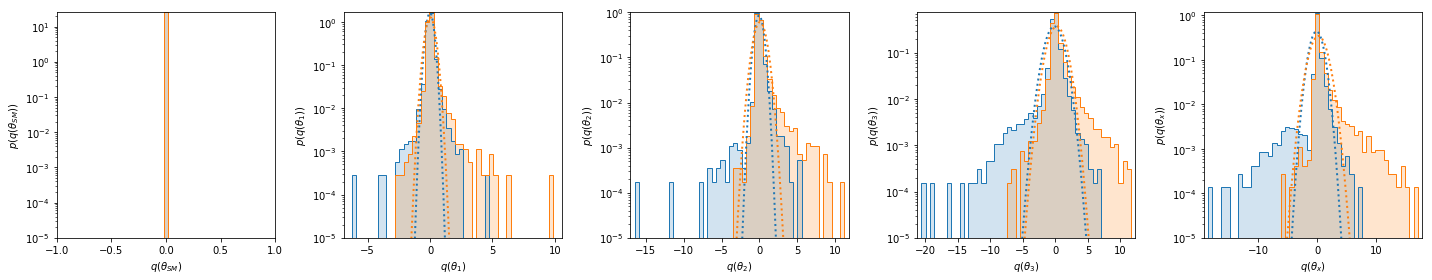

In [8]:
plot_neyman_distributions('truth', 'truth', 'truth')
# plot_neyman_distributions('histo', 'histo_2d_new', 'histo')
# plot_neyman_distributions('carl', 'carl_calibrated_shallow_new', 'parameterized')
# plot_neyman_distributions('scoreregression', 'scoreregression_score_deep_new', 'score_regression')
# plot_neyman_distributions('regression', 'regression_calibrated_new', 'parameterized')
# plot_neyman_distributions('combined', 'combined_calibrated_deep_new', 'parameterized')
# plot_neyman_distributions('combinedregression', 'combinedregression_calibrated_deep_new', 'parameterized')


# Plot and analyse points with worst agreement

/Users/johannbrehmer/anaconda3/envs/higgs_inference/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log
/Users/johannbrehmer/anaconda3/envs/higgs_inference/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in subtract


279 [-0.46064607 -0.42500025] 0.007399999999999962 0.005199999999999982


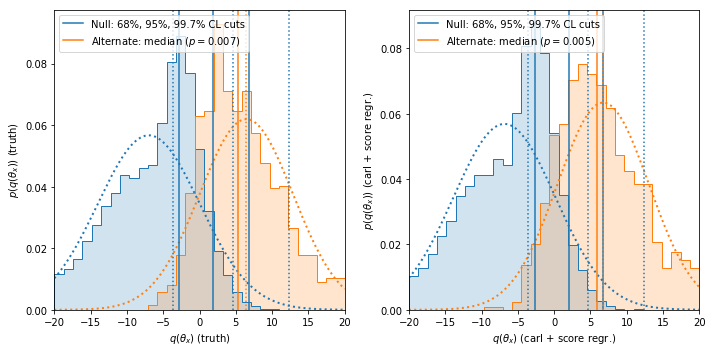

In [87]:
filenames = ['truth', 'combined_calibrated_deep_new']
folders = ['truth', 'parameterized']
labels = ['truth', 'carl + score regr.']

n_bins = 31
xmin, xmax = -20., 20.


p_values_list = [np.load('../results/' + folder + '/neyman_pvalues_' + filename + '.npy')
                 for filename, folder in zip(filenames, folders)]

errors = np.log(p_values_list[1]) - np.log(p_values_list[0])
errors[np.invert(np.isfinite(errors))] = 0.
errors[p_values_list[0] < 0.003] = 0.
t = np.nanargmin( errors )
print(t, thetas[t], p_values_list[0][t], p_values_list[1][t])

plt.figure(figsize=(10.,5.))

for i, (filename, folder, label) in enumerate(zip(filenames, folders, labels)):

    nulls = np.load('../results/' + folder
                   +'/neyman_llr_vs_sm_nulls_'
                   + filename + '.npy')
    alternates = np.load('../results/' + folder
                           +'/neyman_llr_vs_sm_alternates_'
                           + filename + '.npy')
    qcuts = np.load('../results/' + folder
                           +'/neyman_qcut_'
                           + filename + '.npy')
    qmedians = np.load('../results/' + folder
                           +'/neyman_qmedian_'
                           + filename + '.npy')
    p_values = np.load('../results/' + folder
                      + '/neyman_pvalues_' + filename + '.npy')

    plt.subplot(1, 2, i+1)
        
    xvals = np.linspace(xmin, xmax, 200)

    gaussian_null = norm(np.mean(nulls[t]), np.std(nulls[t]))
    gaussian_null_qcuts = np.array([gaussian_null.ppf(cl) for cl in settings.confidence_levels])

    gaussian_alternate = norm(np.mean(alternates[t]), np.std(alternates[t]))
    gaussian_alternate_qmedian = gaussian_alternate.ppf(0.5)

    plt.hist(nulls[t],
             bins=n_bins, range=(xmin, xmax), density=True,
             color='C0', alpha=0.2)
    plt.hist(alternates[t],
             bins=n_bins, range=(xmin, xmax), density=True,
             color='C1', alpha=0.2)
    plt.hist(nulls[t],
             bins=n_bins, range=(xmin, xmax), density=True,
             color='C0', histtype='step')
    plt.hist(alternates[t],
             bins=n_bins, range=(xmin, xmax), density=True,
             color='C1', histtype='step')

    plt.plot(xvals, gaussian_null.pdf(xvals), color='C0', ls=':', lw=2.)
    plt.plot(xvals, gaussian_alternate.pdf(xvals), color='C1', ls=':', lw=2.)

    for j, x in enumerate(qcuts[t]):
        plt.axvline(x=x, ls='-', c='C0', label=r'Null: 68%, 95%, 99.7% CL cuts' if j == 0 else None)
    plt.axvline(x=qmedians[t], ls='-', c='C1', label=r'Alternate: median ($p = ' + format_number(p_values[t], 3) + '$)')

    for j, x in enumerate(gaussian_null_qcuts):
        plt.axvline(x=x, ls=':', c='C0')
    plt.axvline(x=gaussian_alternate_qmedian, ls=':', c='C1')
    plt.legend()

    plt.xlabel(r'$q(\theta_x)$ (' + label + ')')
    plt.ylabel(r'$p(q(\theta_x))$ (' + label + ')')
    plt.xlim(xmin, xmax)
    plt.ylim(0., None)
        
plt.tight_layout()
plt.savefig('../figures/debug/neyman_histograms_worst_agreement_regression.pdf')

# Analyse self-convolutions of single-event distributions

In [3]:
def calculate_self_convolutions(x, max_convolutions, xmin, xmax, nbins):
    
    norm = nbins / (xmax - xmin)
    
    histo, _ = np.histogram(x, bins=nbins, range=(xmin, xmax))
    histo = histo * norm / np.sum(histo)
    
    convoluted_histos = [histo]
    for c in range(max_convolutions + 1):
        convolution = np.convolve(convoluted_histos[-1], histo, mode='same')
        convolution = convolution * norm / np.sum(convolution)
        convoluted_histos.append(convolution)
    return convoluted_histos

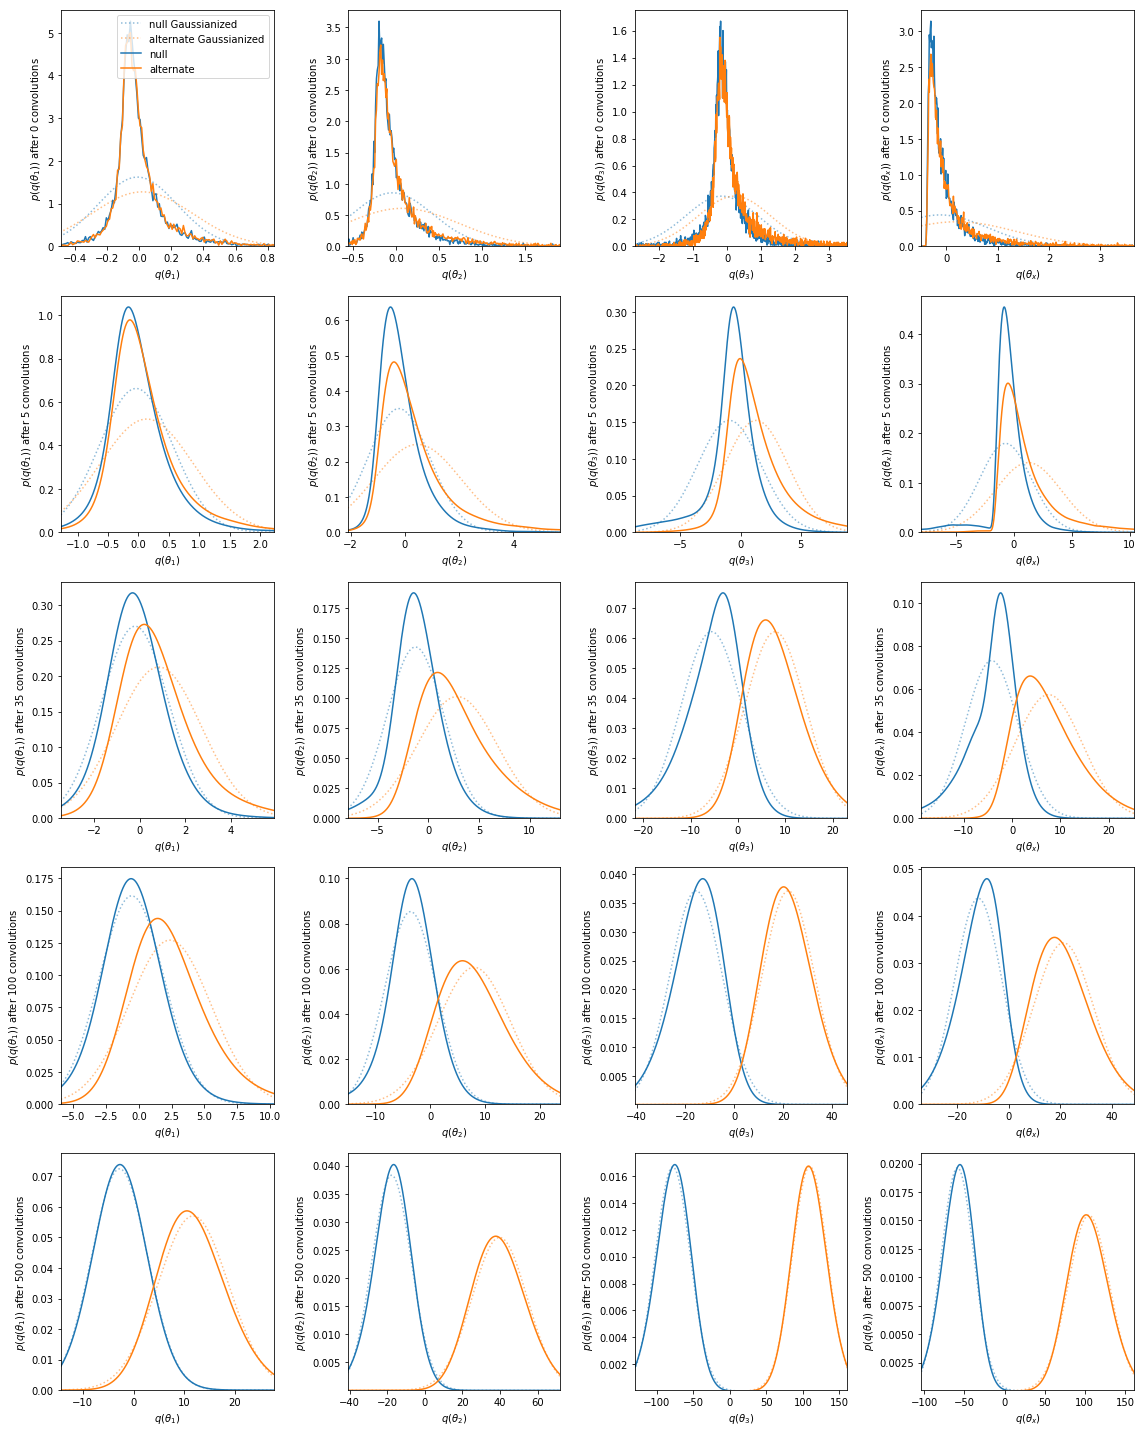

In [6]:
convolutions = [0, 5, 35, 100, 500]

thetas_plot = [3, 429, 391, 279]
thetas_labels = ['1', '2', '3', 'x']

xmin = -200.
xmax = 200.
nbins = 40000
xvals = np.linspace(xmin + 0.5*(xmax - xmin)/nbins, xmax - 0.5*(xmax - xmin)/nbins, nbins)

nulls = np.load('../results/truth/neyman3_llr_vs_sm_nulls_truth.npy')
alternates = np.load('../results/truth/neyman3_llr_vs_sm_alternates_truth.npy')

    
plt.figure(figsize=(4. * len(thetas_plot),4. * (len(convolutions))))
    
for i, (t, label) in enumerate(zip(thetas_plot, thetas_labels)):
        
    convoluted_nulls = calculate_self_convolutions(nulls[t], max(convolutions), xmin, xmax, nbins)
    convoluted_alternates = calculate_self_convolutions(alternates[t], max(convolutions), xmin, xmax, nbins)
    
    #_null = np.unique(nulls[t].round(6))
    #_alternate = np.unique(alternates[t].round(6))
    #convoluted_nulls_no_duplicates = calculate_self_convolutions(_null, max(convolutions), xmin, xmax, nbins)
    #convoluted_alternates_no_duplicates = calculate_self_convolutions(_alternate, max(convolutions), xmin, xmax, nbins)

    for c, convs in enumerate(convolutions):
        
        _null = convoluted_nulls[convs]
        _alternate = convoluted_alternates[convs]
        
        #_null_nd = convoluted_nulls_no_duplicates[convs]
        #_alternate_nd = convoluted_alternates_no_duplicates[convs]
        
        plot_xmin = min( weighted_quantile(xvals, 0.02, _null), weighted_quantile(xvals, 0.02, _alternate)) - .1
        plot_xmax = max( weighted_quantile(xvals, 0.98, _null), weighted_quantile(xvals, 0.98, _alternate)) + .1
        
        ax = plt.subplot(len(convolutions), len(thetas_plot), 1 + c*len(thetas_plot) + i)
        
        hnorm = np.mean(_null)
        mean = np.mean(_null * xvals) / hnorm
        std = (np.mean(_null * (xvals - mean)**2) / hnorm)**0.5
        gaussian_null = norm(mean, std)
        gaussian_null_qcuts = np.array([gaussian_null.ppf(cl) for cl in settings.confidence_levels])
        
        hnorm = np.mean(_alternate)
        mean = np.mean(_alternate * xvals) / hnorm
        std = (np.mean(_alternate * (xvals - mean)**2) / hnorm)**0.5
        gaussian_alternate = norm(mean, std)
        gaussian_alternate_qmedian = gaussian_alternate.ppf(0.5)
        
        #hnorm = np.mean(_null_nd)
        #mean = np.mean(_null_nd * xvals) / hnorm
        #std = (np.mean(_null_nd * (xvals - mean)**2) / hnorm)**0.5
        #gaussian_null_nd = norm(mean, std)
        #gaussian_null_nd_qcuts = np.array([gaussian_null.ppf(cl) for cl in settings.confidence_levels])
        
        #hnorm = np.mean(_alternate_nd)
        #mean = np.mean(_alternate_nd * xvals) / hnorm
        #std = (np.mean(_alternate_nd * (xvals - mean)**2) / hnorm)**0.5
        #gaussian_alternate_nd = norm(mean, std)
        #gaussian_alternate_nd_qmedian = gaussian_alternate.ppf(0.5)
        
        plt.plot(xvals, gaussian_null.pdf(xvals), color='C0', ls=':', alpha=0.5, label='null Gaussianized')
        plt.plot(xvals, gaussian_alternate.pdf(xvals), color='C1', ls=':', alpha=0.5, label='alternate Gaussianized')
        
        #plt.plot(xvals, gaussian_null_nd.pdf(xvals), color='C2', ls=':', alpha=0.5, label='null w/o duplicates Gaussianized')
        #plt.plot(xvals, gaussian_alternate_nd.pdf(xvals), color='C3', ls=':', alpha=0.5, label='alternate w/o duplicates Gaussianized')
        
        plt.plot(xvals, _null, color='C0', label='null')
        plt.plot(xvals, _alternate, color='C1', label='alternate')
        
        #plt.plot(xvals, _null_nd, color='C2', ls='--', label='null w/o duplicates')
        #plt.plot(xvals, _alternate_nd, color='C3', ls='--', label='alternate w/o duplicates')
        
        if c==0 and i==0:
            plt.legend()
        
        plt.xlabel(r'$q(\theta_{' + label + r'})$')
        plt.ylabel(r'$p(q(\theta_{' + label + r'}))$ after ' + str(convs) + ' convolutions')
        plt.xlim(plot_xmin, plot_xmax)
        plt.ylim(1.e-4, None)
        #ax.set_yscale("log", nonposy='clip')

plt.tight_layout()
plt.savefig('../figures/neyman/self_convolutions.pdf')
    